In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [7]:
# State
class AgentState(TypedDict):
    number1: int
    number2: int
    finalNumber: int
    operation: str

In [8]:
# Multiple Nodes
def adder(state: AgentState) -> AgentState:
    """Adds two numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtracts two numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state
# Conditional Nodes
def router(state: AgentState) -> AgentState:
    """Selects the next node based on condition"""
    if state["operation"] == "-":
        return "subtractor_operation"
    else:
        return "adder_operation"

    # NOTE: we do not run the function, we return a string that is connected using a Edge. Not returning state.



In [11]:
# StateGraph
# NOTE: understand that the states do not change in the conditional node

graph = StateGraph(AgentState)
graph.add_node("adder_node", adder)
graph.add_node("subtractor_node", subtractor)
graph.add_node("router_node", lambda state: state)  # pass through node (not hardly connected but decided during the edge making process, what would be the next node) nahi rehne se nothing happens, directly make the edge from the START node

# Edges
graph.add_edge(START, "router_node")
# IMPORTANT: Condtional Edges
graph.add_conditional_edges(
    "router_node",
    router,  # function to decide the next node
    {   # Conditiional node output : node
        "adder_operation": "adder_node",
        "subtractor_operation": "subtractor_node"
    }
    # mention the conditional path in a mapping
)

# End from both the nodes
graph.add_edge("adder_node", END)
graph.add_edge("subtractor_node", END)

app = graph.compile()


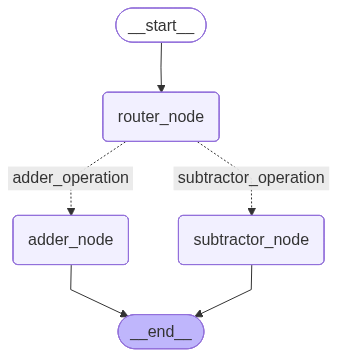

In [12]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
# Testing
result = app.invoke({"number1": 10, "number2": 5, "operation": "-"})
print(f"Addition Result: {result['finalNumber']}")

Addition Result: 5
